# Extract the PSF  some stars in HD158485 field
=====================================================================

- Creation : Friday 2016 June 24th
- Author Sylvie Dagoret-Campagne 
- affiliation : LAL/IN2P3/CNRS

PSF of HD163466 with grating


## 1) Import package

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits

import ccdproc
print 'ccdproc version',ccdproc.__version__

from astropy.modeling import models

ccdproc version 1.0.1


In [2]:
import photutils
from astropy.stats import sigma_clipped_stats
from photutils import daofind
from photutils import CircularAperture
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize

In [3]:
#photutils.test()

In [4]:
from scipy import stats 
from scipy import ndimage
import os
from datetime import datetime, timedelta

In [5]:
import libMonocamBaseImages           # my tool library written to do that CCD reduction

In [6]:
now=datetime.utcnow()  # choose UTC time
datestr=str(now)
print 'standard date format for the analysis :',datestr
#  want the following format '2016-05-10T11:55:27.267'
date_of_analysis=now.strftime('%Y-%m-%dT%H:%M:%S')
print 'fits date format for the analysis : ',date_of_analysis

standard date format for the analysis : 2016-07-06 14:03:41.011101
fits date format for the analysis :  2016-07-06T14:03:41


## 3) Configuration of the input file

- HD158485_grat_science.fits
- HD159222_grat_science.fits
- HD163466_grat_science.fits


In [7]:
#object_name='HD158485_grat_20'
#object_name='HD159222_grat'
object_name='HD158485_grat'

In [8]:
path='./HD158485_grat'
basefilename='AssScImHD158485_grat_1.fits' # check master bias
filename=os.path.join(path,basefilename)

## 4) Read the images

In [9]:
allimages = []
ccd_chan = ccdproc.CCDData.read(filename, hdu=0,unit='adu') 
allimages.append(ccd_chan)

data=ccd_chan.data

## 5) Shows the images

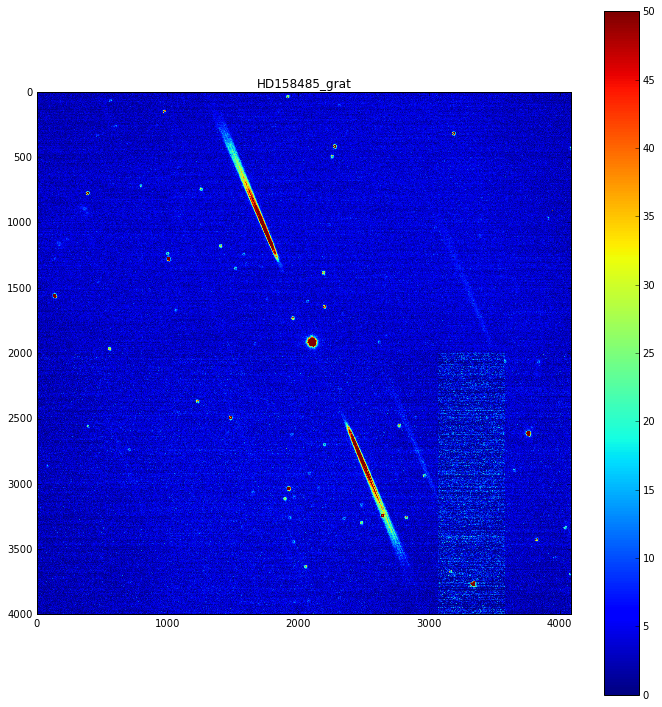

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
img=ax.imshow(ccd_chan,vmin=0,vmax=50.)
plt.title(object_name)
plt.tight_layout()
plt.colorbar(img)
#plt.savefig(outputfigfilename3)

# 6) Subtract background

code implemented from photutil information there:
https://photutils.readthedocs.io/en/latest/photutils/background.html#

In [11]:
from photutils.background import Background2D
bkg = Background2D(data, (100, 100), filter_size=(3, 3),method='median')

### does the background varies over the field of view ?

In [12]:
print('median background = ',bkg.background_median)
print('median rms = ',bkg.background_rms_median)

('median background = ', 3.7440242511515027)
('median rms = ', 2.3539771777890985)


### Radiography of the residual background

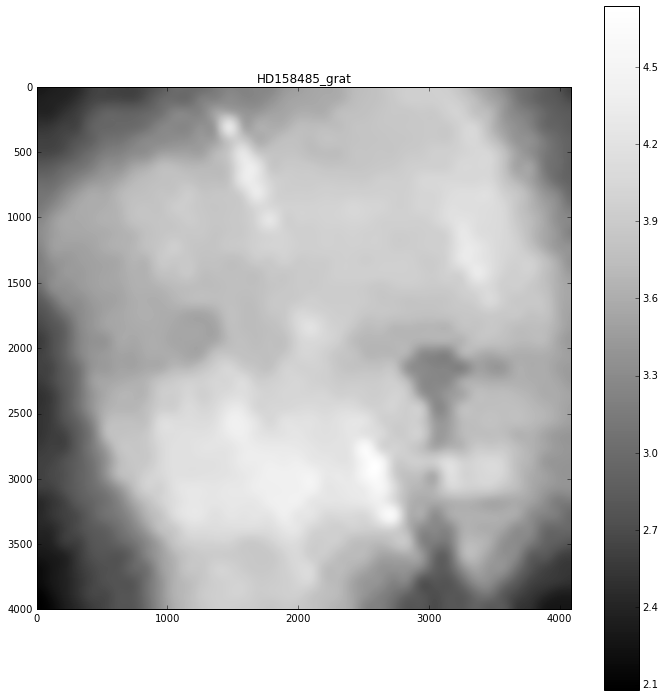

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
#plt.imshow(bkg.background, origin='lower', cmap='Greys_r')
img=ax.imshow(bkg.background, cmap='Greys_r')
plt.title(object_name)
plt.tight_layout()
plt.colorbar(img)

### Now subtract residual the background

In [14]:
data2=data - bkg.background

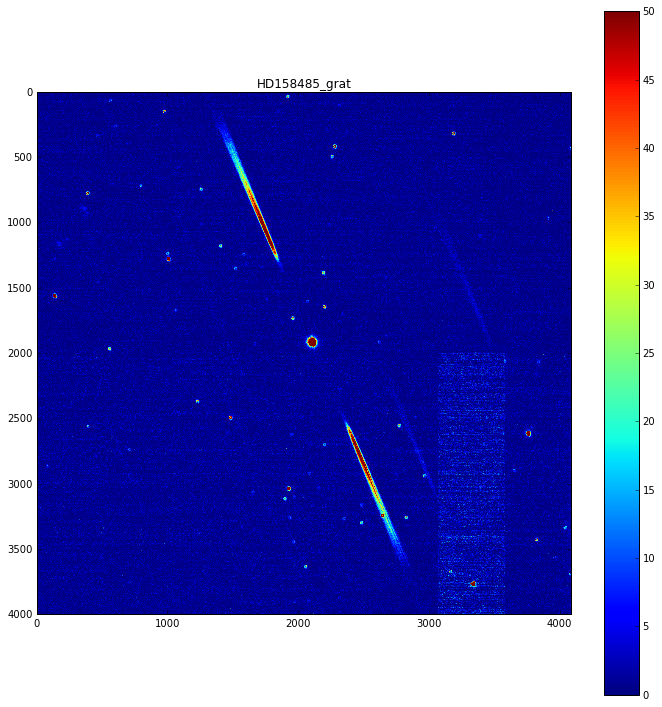

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
#plt.imshow(bkg.background, origin='lower', cmap='Greys_r')
img=plt.imshow(data2, vmin=0,vmax=50.)
#img=plt.imshow(data2)
plt.title(object_name)
plt.tight_layout()
plt.colorbar(img)

## 8.) Compute signal and noise

In [16]:
mean, median, std = sigma_clipped_stats(data2, sigma=10.0, iters=5)    
print(mean, median, std)    

(0.087962434501669115, -0.01102840784160164, 3.0155361453822951)


In [17]:
sources = daofind(data2 - median, fwhm=3.0, threshold=50.*std)
sources.sort('flux')
print(sources)   

 id   xcentroid     ycentroid   ...      peak          flux           mag       
--- ------------- ------------- ... ------------- ------------- ----------------
 20 3760.47744803 2610.36019496 ... 650.699403017 1.07042252568 -0.0738880992367
 21 3749.42066663  2612.1094519 ... 639.822129764 1.18140429697  -0.180996365322
 32 3337.58400965 3770.85899616 ...   727.1688041 1.39791324918   -0.36370055268
 30  3322.8185674 3766.85860173 ... 1132.04178587 1.58839610896  -0.502397036291
 22 3759.90165831   2617.855778 ... 621.195434252 1.70490449455  -0.579250139184
 25 2193.05169814 3589.32215504 ...  292.21787984 1.71688339062  -0.586851998053
 24  3749.1738067 2623.12691175 ... 666.309894197 1.71956809568  -0.588548446895
 23 3746.65256963 2618.05509471 ... 799.130173022 1.87781072059   -0.68412953539
 19 3756.04379448 2610.53107922 ...  866.61620799 2.38809827127  -0.945130485575
  1 3938.82037316  914.35497253 ... 464.131620488 2.50169579318  -0.995586245634
...           ...           

In [18]:
sources

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
20,3760.47744803,2610.36019496,0.337871373193,-0.789704565643,-0.124815389321,25.0,0.0,650.699403017,1.07042252568,-0.0738880992367
21,3749.42066663,2612.1094519,0.521001402207,-0.469421056286,-0.069781229167,25.0,0.0,639.822129764,1.18140429697,-0.180996365322
32,3337.58400965,3770.85899616,0.455185377144,0.912411100472,-0.643813331124,25.0,0.0,727.1688041,1.39791324918,-0.36370055268
30,3322.8185674,3766.85860173,0.541452338409,-0.379761881063,0.984690022854,25.0,0.0,1132.04178587,1.58839610896,-0.502397036291
22,3759.90165831,2617.855778,0.516571637482,-0.170385240288,0.127768079257,25.0,0.0,621.195434252,1.70490449455,-0.579250139184
25,2193.05169814,3589.32215504,0.692577768432,0.926382113095,-0.137036091899,25.0,0.0,292.21787984,1.71688339062,-0.586851998053
24,3749.1738067,2623.12691175,0.462319669817,0.917196462345,-0.157374078413,25.0,0.0,666.309894197,1.71956809568,-0.588548446895
23,3746.65256963,2618.05509471,0.455069274144,0.625074548498,0.979449397275,25.0,0.0,799.130173022,1.87781072059,-0.68412953539
19,3756.04379448,2610.53107922,0.52808188749,-0.348987828697,0.212346014091,25.0,0.0,866.61620799,2.38809827127,-0.945130485575


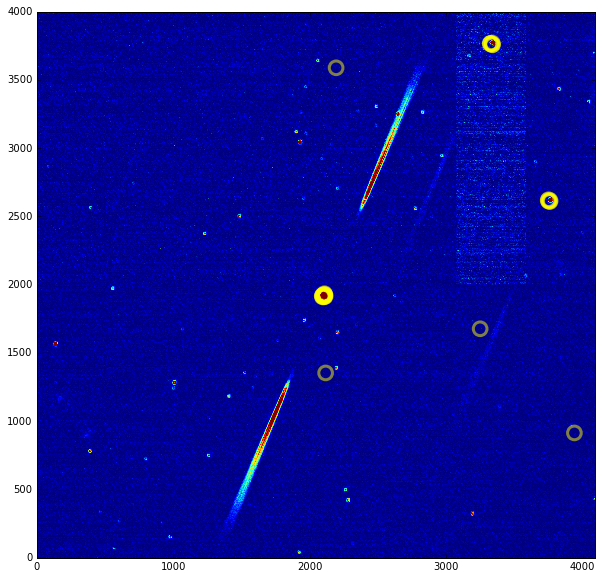

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
positions = (sources['xcentroid'], sources['ycentroid'])
apertures = CircularAperture(positions, r=50.)
norm = ImageNormalize(stretch=SqrtStretch())
ax.imshow(data2,vmin=0,vmax=50.,origin='lower')
#ax.imshow(data, cmap='Greys', origin='lower', norm=norm)
apertures.plot(color='yellow', lw=3., alpha=0.5)

### For example shows the 25 first stars

In [20]:
NBSTARS=25
XX=np.zeros(NBSTARS)
YY=np.zeros(NBSTARS)



selected_stars=sources.as_array()
NBFOUNDSTARS=np.min([NBSTARS,selected_stars.shape[0]])

for istar in range(NBFOUNDSTARS):
    XX[istar] = int(selected_stars[istar][1])
    YY[istar] = int(selected_stars[istar][2])   
    print XX[istar],YY[istar]

3760.0 2610.0
3749.0 2612.0
3337.0 3770.0
3322.0 3766.0
3759.0 2617.0
2193.0 3589.0
3749.0 2623.0
3746.0 2618.0
3756.0 2610.0
3938.0 914.0
3338.0 3757.0
3336.0 3764.0
3337.0 3758.0
3325.0 3768.0
2107.0 1934.0
3323.0 3764.0
2116.0 1353.0
2091.0 1912.0
3248.0 1677.0
2107.0 1928.0
2091.0 1918.0
2097.0 1910.0
2095.0 1920.0
2111.0 1920.0
2111.0 1912.0


## Work with one PSF of one star

In [21]:
# Extract the plot of a PSF
index=0

onepsf=data2[YY[index]-10:YY[index]+10,XX[index]-10:XX[index]+10]
onepsfX=onepsf.sum(axis=0)
onepsfY=onepsf.sum(axis=1)

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


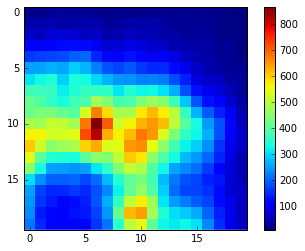

In [22]:
im=plt.imshow(onepsf,interpolation='None')
#im=plt.imshow(onepsf)
plt.colorbar(im)

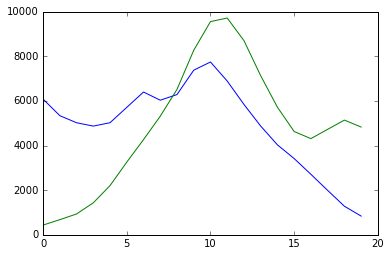

In [23]:
plt.plot(onepsfX)
plt.plot(onepsfY)

In [24]:
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)  # Fast and numerically precise
    return (average, np.sqrt(variance))

In [25]:
DELTA_NBINSX=10
DELTA_NBINSY=10

In [26]:
weighted_avg_and_std(np.arange(onepsfX.shape[0]),onepsfX)

(8.0452202678186779, 4.8599744442077615)

In [27]:
weighted_avg_and_std(np.arange(onepsfY.shape[0]),onepsfY)

(11.29154162779262, 4.2902511303943767)

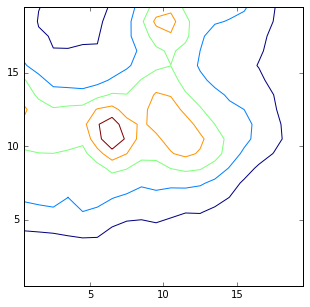

In [28]:
plt.figure(figsize=(5,5))
#onepsf2 = onepsf / np.linalg.norm(onepsf, axis=-1)[:, np.newaxis]
onepsf2 = onepsf / np.sum(onepsf)
levels=np.array([1,0.682,0.75,0.89,0.94,0.96,0.97])
#plt.contour(onepsf2,levels=levels,origin='lower') matmpltlib bug
plt.contour(onepsf2,origin='lower')

In [29]:
XV=np.arange(2*DELTA_NBINSX)-DELTA_NBINSX
YV=np.arange(2*DELTA_NBINSY)-DELTA_NBINSY
Xgrid,Ygrid=np.meshgrid(XV,YV)

In [30]:
weighted_avg_and_std(Xgrid,onepsf2)

(-1.9547797321813221, 4.8599744442077615)

In [31]:
weighted_avg_and_std(Ygrid,onepsf2)

(1.2915416277926179, 4.2902511303943767)

### Estimation of PRF (PSF) for a bunch of stars


I could not use any of the utilities function.
It lacks of working examples

In [32]:
import photutils.psf 
from photutils.psf import psf_photometry

In [33]:
from astropy.modeling import models, fitting

In [34]:
import photutils
from photutils import psf

photutils.__version__

u'0.3.dev1833'

### Extraction of a few stars for visualization

In [35]:
DELTA_NBINSX=10
DELTA_NBINSY=10

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


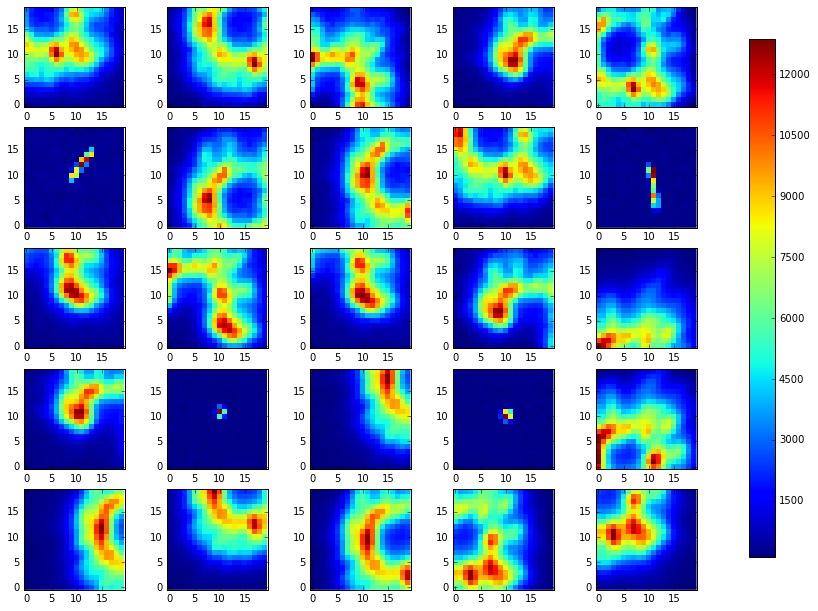

In [36]:
fig, axes = plt.subplots(nrows=5, ncols=5)
fig.set_size_inches(12, 9)
# Plot kernels
for i in range(5):
    for j in range(5):
        index=5*i+j
        if index <NBFOUNDSTARS :
            prf_image = data2[YY[index]-DELTA_NBINSY:YY[index]+DELTA_NBINSY,XX[index]-DELTA_NBINSX:XX[index]+DELTA_NBINSX]
            im = axes[i, j].imshow(prf_image, interpolation='None',origin='lower')
			
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
plt.colorbar(im, cax=cax)
plt.subplots_adjust(left=0.05, right=0.85, top=0.95, bottom=0.05)
plt.show()

In [37]:
selected_stars=sources.as_array()

NB_OF_STARS=selected_stars.shape[0]
SIGMAX_OF_STARS=np.zeros(NB_OF_STARS)
SIGMAY_OF_STARS=np.zeros(NB_OF_STARS)
for istar in range(selected_stars.shape[0]):
    XXs = int(selected_stars[istar][1])
    YYs = int(selected_stars[istar][2])   
    star_image = data2[YYs-DELTA_NBINSY:YYs+DELTA_NBINSY,XXs-DELTA_NBINSX:XXs+DELTA_NBINSX]
    thepsf = star_image / np.sum(star_image)
    SIGMAX_OF_STARS[istar]=weighted_avg_and_std(Xgrid,thepsf)[1]
    SIGMAY_OF_STARS[istar]=weighted_avg_and_std(Ygrid,thepsf)[1]

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in sqrt


In [38]:
SIGMAX_OF_STARS

array([ 4.85997444,  4.81757429,  4.87243708,  3.65773265,  5.20082471,
        1.59138169,  4.739664  ,  3.93448288,  5.66842851,         nan,
        3.78663556,  4.97459878,  4.09572405,  4.59036856,  5.22881736,
        3.90705066,  1.25898321,  3.29847776,         nan,  5.44083612,
        3.24589375,  4.59996513,  4.05435199,  4.24962595,  4.23884526,
        5.681793  ,  4.36394811,  4.58546799,  4.55594128,  5.0045514 ,
        5.70653401,  5.03592526])

In [39]:
SIGMAY_OF_STARS

array([ 4.29025113,  4.87712406,  5.05266711,  3.92595735,  5.84394414,
        1.47374485,  5.17626302,  5.5645804 ,  4.37748537,  2.14837633,
        3.94621358,  5.4752545 ,  4.19777599,  4.36833724,  4.1108595 ,
        3.65647757,  0.01785255,  4.61720382,  1.18346459,  4.81724433,
        5.34406933,  4.06915598,  5.56868421,  5.87307711,  4.27755812,
        5.1035085 ,  4.73541738,  5.19142797,  5.26468123,  4.50810285,
        4.38430305,  5.80664878])

#### Cut NAN

In [40]:
all_sigx=SIGMAX_OF_STARS[np.logical_not(np.isnan(SIGMAX_OF_STARS))]
all_sigy=SIGMAY_OF_STARS[np.logical_not(np.isnan(SIGMAY_OF_STARS))]

#### Cut too low values

In [41]:
all_sigx=all_sigx[all_sigx>2.0]
all_sigy=all_sigy[all_sigy>2.0]

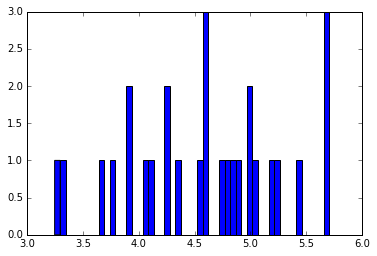

In [42]:
h1=plt.hist(all_sigx,50)

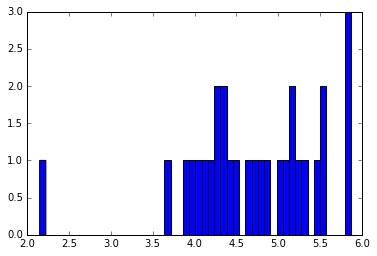

In [43]:
h1=plt.hist(all_sigy,50)

In [44]:
all_sigx.mean()

4.5855882338745619

In [45]:
print 'average prf(x) = {:2.2f} +/- {:2.2f} pixels ==> psf  {:2.2f} +/- {:2.2f} arcsec '.format(all_sigx.mean(),all_sigx.std(),all_sigx.mean()*0.4*2.36,all_sigx.std()*0.4*2.26)
print 'average prf(y) = {:2.2f} +/- {:2.2f} pixels ==> psf  {:2.2f} +/- {:2.2f} arcsec '.format(all_sigy.mean(),all_sigy.std(),all_sigy.mean()*0.4*2.36,all_sigy.std()*0.4*2.26)

average prf(x) = 4.59 +/- 0.67 pixels ==> psf  4.33 +/- 0.61 arcsec 
average prf(y) = 4.71 +/- 0.79 pixels ==> psf  4.45 +/- 0.71 arcsec 


In [46]:
print 'average prf(x) = {:2.2f} +/- {:2.2f} pixels ==> psf  {:2.2f} +/- {:2.2f} arcsec '.format(np.median(all_sigx),all_sigx.std(),np.median(all_sigx)*0.4*2.36,all_sigx.std()*0.4*2.26)
print 'average prf(y) = {:2.2f} +/- {:2.2f} pixels ==> psf  {:2.2f} +/- {:2.2f} arcsec '.format(np.median(all_sigy),all_sigy.std(),np.median(all_sigy)*0.4*2.36,all_sigy.std()*0.4*2.26)

average prf(x) = 4.60 +/- 0.67 pixels ==> psf  4.34 +/- 0.61 arcsec 
average prf(y) = 4.74 +/- 0.79 pixels ==> psf  4.47 +/- 0.71 arcsec 
